שאלת החקר: האם ניתן לקבוע על פי הפרמטרים הבאים אם יהיו משקעים ומה יהיו סוגם?
הפרמטרים (לפני ניקוי והשמטה):

•   תאריך 

•   סוג המשקע

•   טמפרטורה (-21.8-39.9)C

•   טמפרטורה מורגשת (-27.7-39.3)F

•   אחוזי לחות (0-100%)

•   מהירות רוח (0-63.9)KM/H

•   כיוון הרוח 

•   ראות- לפי מרחק (0-16.1)KM

•   לחץ אוויר (0-1.05k)millibars

•   סיכום יומי במילים 

בפרויקט שלי, אנסה ללמד את המכונה לקבוע האם יורד גשם/שלג/... או אין משקעים, כתלות בנתוני מדידות של הפרמטרים הכתובים למעלה. הנתונים בקובץ מורכבים מ- 12 עמודות (אחת מהן היא סוג המשקעים) ו-96454 שורות של מדידות.

התפלגויות נתונים על פי KAGGLE

התפלגות נתונים של טמפרטורה:
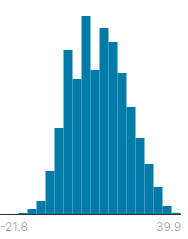

התפלגות של לחות:
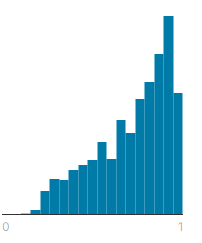

התפלגות של מהירות הרוח:
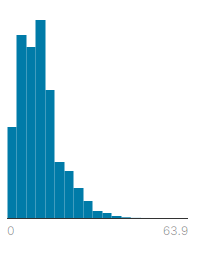

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data/weatherHistory.csv')

Data set: [Weather Hystory](https://drive.google.com/file/d/1ez1zfgiRKdefwEA8uJ5y7Oy-ovRMiWM5/view?usp=sharing)

# Data analysis

ניתוח הנתונים:

הצגת הנתונים*

הצגת גרפים*

ניקוי הנתונים*

פיטצר איג'נירינג* (Feature engineering)- ניתוח התכונות

יחסים*

### Data presentation

בפרק הזה מוצגים הנתונים בדרכים שונות. מוצגת דגימה מהנתונים, מוצג סוג הנתונים וגודלם. כמו כן מוצגים מאפיינים של הנתונים לדוגמא: ממוצע, חציון, מינימום, מקסימום וכדומה. בפרק הזה אני יוצר עמודה של נתונים מספריים עבור הסיווג כדי שיהיה קל יותר להציג את הנתונים בגרפים בפרק הבא.

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               96453 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [ ]:
df.select_dtypes(include='float64').nunique()

Temperature (C)             7574
Apparent Temperature (C)    8984
Humidity                      90
Wind Speed (km/h)           2484
Wind Bearing (degrees)       360
Visibility (km)              949
Loud Cover                     1
Pressure (millibars)        4979
dtype: int64

In [ ]:
df.select_dtypes(include='object').nunique()

Formatted Date    96429
Summary              27
Precip Type           3
Daily Summary       214
dtype: int64

In [ ]:
numbered_percip_type=df['Precip Type']
df['numbered_percip_type']=numbered_percip_type
df['numbered_percip_type'].replace({'rain':1,'snow':2}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               96453 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
 12  numbered_percip_type      96453 non-null  object 
dtypes: float64(8), object(5)
memory usage: 9.6+ MB


In [ ]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


### Data visualization


בפרק הזה אציג גרפים המקשרים בין הנתונים בדאטה סט, וגרפים המייצגים את הנתונים בפני עצמם (התפלגות, ספירה). 

אציג סוגי גרפים רבים ובינהם: COUNT, SCATTER, KDE, HISTOGRAM
ועוד.

הגרפים יוצגו באמצעות סיפריית SEABORN. 

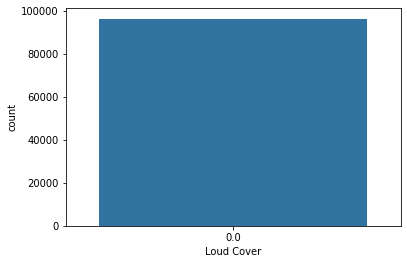

In [ ]:
sns.countplot(x='Loud Cover',data=df);

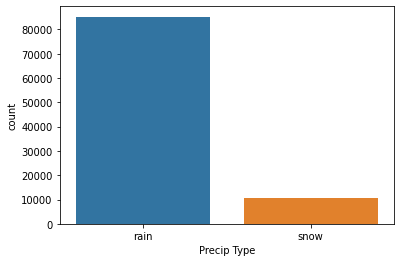

In [ ]:
sns.countplot(x='Precip Type',data=df);

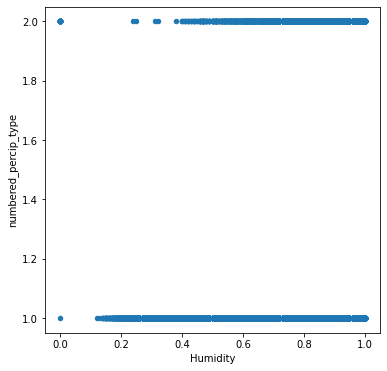

In [ ]:
df.plot(kind='scatter', x='Humidity', y='numbered_percip_type', figsize=(6,6))

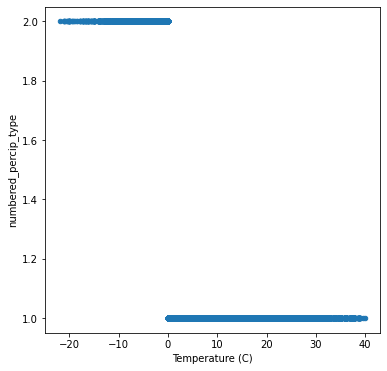

In [ ]:
df.plot(kind='scatter', x='Temperature (C)', y='numbered_percip_type', figsize=(6,6))

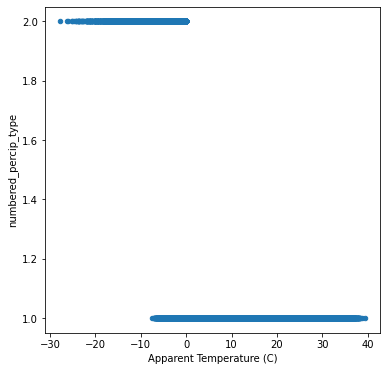

In [ ]:
df.plot(kind='scatter', x='Apparent Temperature (C)', y='numbered_percip_type', figsize=(6,6))

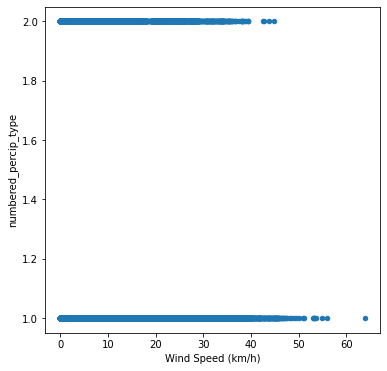

In [ ]:
df.plot(kind='scatter', x='Wind Speed (km/h)', y='numbered_percip_type', figsize=(6,6))

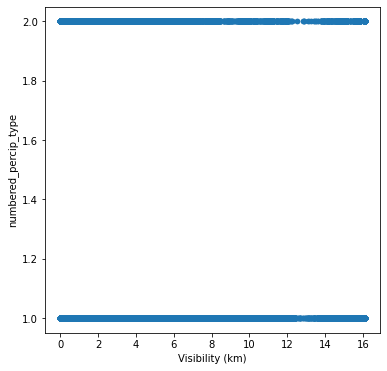

In [ ]:
df.plot(kind='scatter', x='Visibility (km)', y='numbered_percip_type', figsize=(6,6))

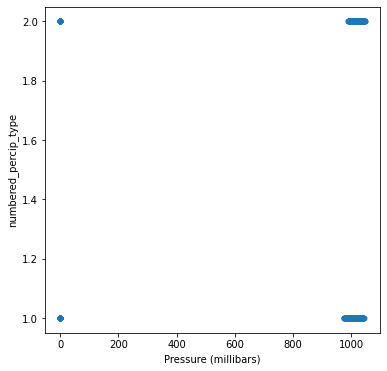

In [ ]:
df.plot(kind='scatter', x='Pressure (millibars)', y='numbered_percip_type', figsize=(6,6))

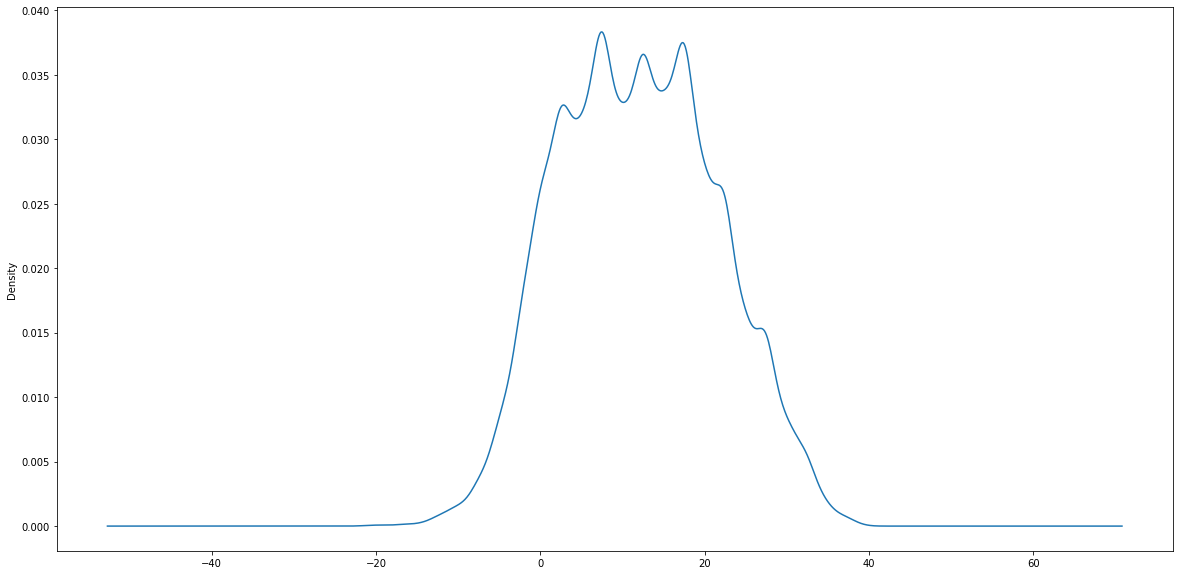

In [ ]:
df['Temperature (C)'].plot(kind='kde', figsize=(20,10))

**אין התפלגות נורמלית כמו בקודם**

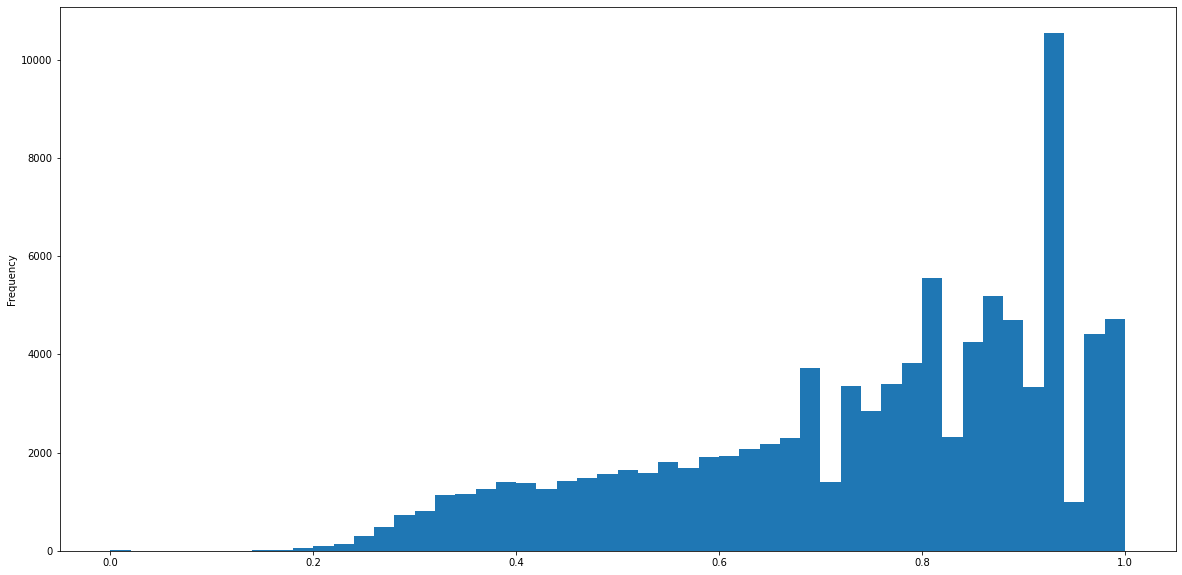

In [ ]:
df['Humidity'].plot(kind='hist',bins=50, figsize=(20,10))

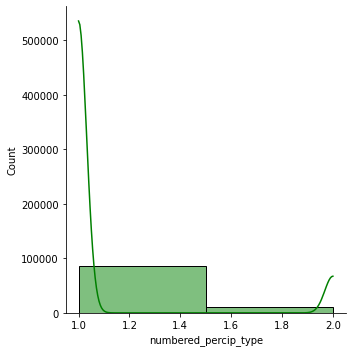

In [ ]:
sns.displot(df['numbered_percip_type'],kde=True,color='green',bins=2);

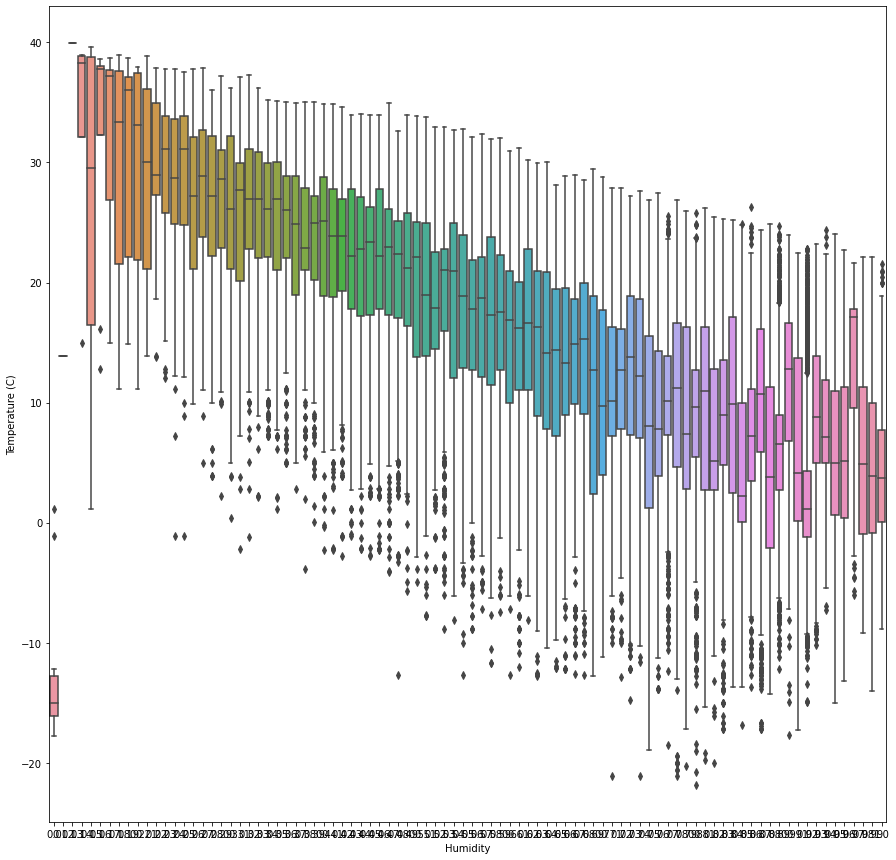

In [ ]:
plt.figure(figsize=(15, 15))
sns.boxplot(x='Humidity',y='Temperature (C)',data=df);

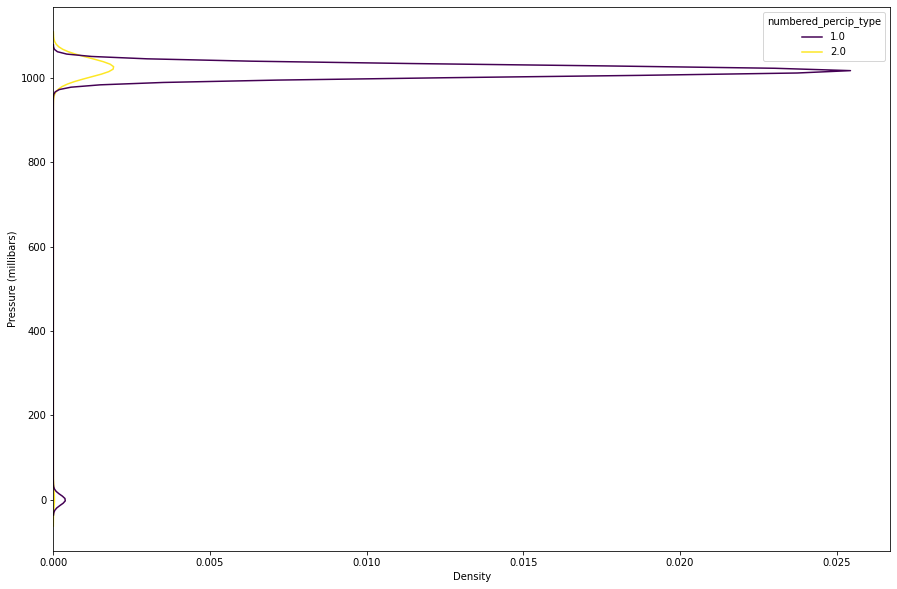

In [ ]:
plt.figure(figsize = (15,10))
sns.kdeplot(y='Pressure (millibars)',data=df, hue='numbered_percip_type',palette='viridis');

### Data cleaning

ניקוי הנתונים. בפרק זה אנקה את הנתונים מתאים ריקים. כפי שאראה בהמשך, רק בעמודת המשקעים יש תאים ריקים. אך לא צריך להשמיט את השורות, אלא למלא את התאים הריקים ב CLEAR, כלומר אין משקעים.

In [ ]:
df.drop('numbered_percip_type', axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               96453 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


יש תאים ריקים בעמודה של סוג המשקע. בדרך כלל הייתי פשוט מסיר את השורות, אבל סביר שהתכוונו שאם אין ערך, לא היו משקעים, ולכן אכניס לכל תאי ה NAN, CLEAR

In [ ]:
null_rows=df[df['Precip Type'].isnull()]
null_rows.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [ ]:
df['Precip Type'].fillna('clear',inplace=True)

In [ ]:
df['Precip Type'].isnull().sum()

0

In [ ]:
df["Precip Type"][52672]

'clear'

### Feature engineering

בפרק הזה אטפל בעמודות- הפרמטרים. אפרק את נתוני התאריך לפי חודש- הדבר היחיד שרלוונטי, אפריד בין החודשים כדי לשמור על לינאריות הנתונים ואוריד עמודות לא רלוונטיות או שגויות. אפרט לפני כל מהלך על הסיבות המדויקות.

In [ ]:
df['Month']=0
for i in range (96453):
  if df['Formatted Date'][i][5]=='-':
    df['Month'][i]=(int)(df['Formatted Date'][i][6])
  else:
    df['Month'][i]=(int)(df['Formatted Date'][i][5])*10+(int)(df['Formatted Date'][i][6])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.loc[df['Month']==0]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Month


In [ ]:
df['Month']

0        4
1        4
2        4
3        4
4        4
        ..
96448    9
96449    9
96450    9
96451    9
96452    9
Name: Month, Length: 96453, dtype: int64

In [ ]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Month
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,4
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,4
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,4
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,9
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,9
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,9
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               96453 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
 12  Month                     96453 non-null  int64  
dtypes: float64(8), int64(1), object(4)
memory usage: 9.6+ MB


 הפרדת החודשים השונים לעמודות שונות. חושב לעשות את זה כיוון שאם לא, המידע על החודשים יכול להיאבד כשמנרמלים את הדאטה סט.
ניתן לראות בתמונה נרמול של הדאטה וסט, וכיצד מספרי החודשים הופכים ללא לינארים

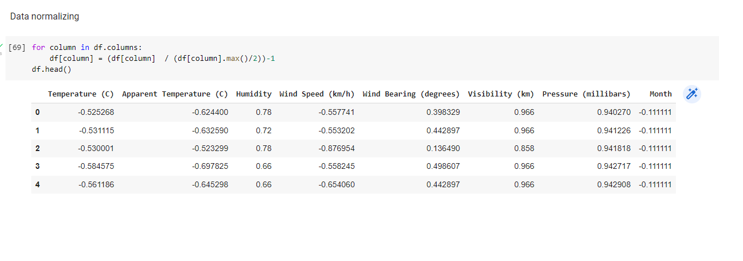

In [ ]:
df['Month'].unique()

array([ 4,  8, 12,  2,  1,  7,  6,  3,  5, 11, 10,  9])

In [ ]:
Months=pd.get_dummies(df['Month'], drop_first=False)
Months

,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,0,0,0,0,0,0,0,0,1,0,0,0
96449,0,0,0,0,0,0,0,0,1,0,0,0
96450,0,0,0,0,0,0,0,0,1,0,0,0
96451,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df=pd.concat([df,Months], axis=1)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,...,3,4,5,6,7,8,9,10,11,12
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,...,0,1,0,0,0,0,0,0,0,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,...,0,1,0,0,0,0,0,0,0,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,...,0,1,0,0,0,0,0,0,0,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,...,0,1,0,0,0,0,0,0,0,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,...,0,0,0,0,0,0,1,0,0,0
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,...,0,0,0,0,0,0,1,0,0,0
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,...,0,0,0,0,0,0,1,0,0,0
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.rename(columns={1:'January',2:'Fabuary',3:'March',4:'April',5:'May',6:'June'}, inplace=True)
df.rename(columns={7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}, inplace=True)

In [ ]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,...,March,April,May,June,July,August,September,October,November,December
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,...,0,1,0,0,0,0,0,0,0,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,...,0,1,0,0,0,0,0,0,0,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,...,0,1,0,0,0,0,0,0,0,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,...,0,1,0,0,0,0,0,0,0,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,...,0,0,0,0,0,0,1,0,0,0
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,...,0,0,0,0,0,0,1,0,0,0
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,...,0,0,0,0,0,0,1,0,0,0
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df=df.drop('Month',axis=1)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,...,March,April,May,June,July,August,September,October,November,December
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,...,0,1,0,0,0,0,0,0,0,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,...,0,1,0,0,0,0,0,0,0,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,...,0,1,0,0,0,0,0,0,0,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,...,0,1,0,0,0,0,0,0,0,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,...,0,1,0,0,0,0,0,0,0,0


________________________________________________________________________________

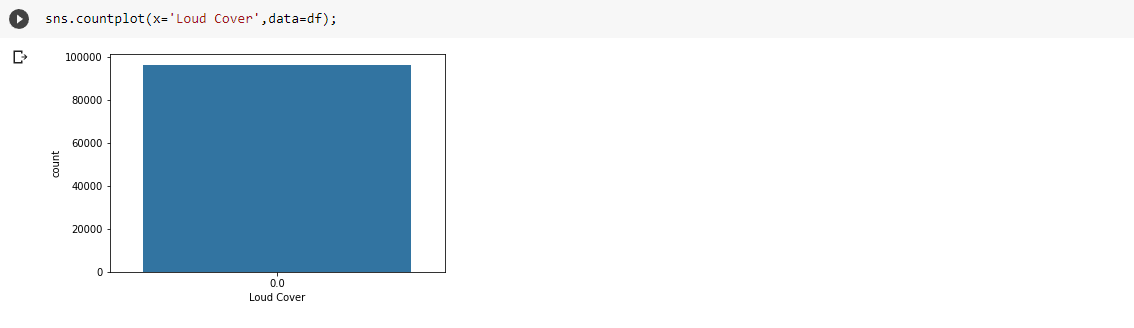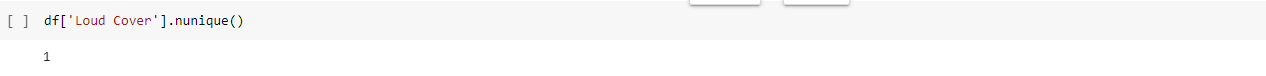

כיוון שלמשקעים שלושה ערכים שונים ואילו לעמוד LOUD COVER יש רק סוג אחד, היא לא רלוונטית וכנראה טעות אנוש

In [ ]:
df=df.drop('Loud Cover', axis=1)

כל הנתונים הללו אינם לינארים ולא מספריים בכלל. הם כולם סובייקטיבים ולא אובייקטיבים ו"מקצועיים" מספיק. לדוגמא סיכום היום במילים, אין משהו שניתן לעשות עם זה. את התאריך אוריד גם כן כיוון ששמרתי את החודשים

In [ ]:
Y=df['Precip Type']
df=df.drop(columns=['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'])

### Correlation

הצגת היחסים בין הנתונים לאחר שנוקו וסודרו. פעם אחת בטבלה רגילה, ופעם אחת בטבלת קור חום- כלומר, ככול שהיחסים מתקרבים ל 1 יהיה חם יותר (אדום), וככל שמתקרבים ל -1 יהיה קר יותר(כחול)

In [ ]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),January,Fabuary,March,April,May,June,July,August,September,October,November,December
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447,-0.354458,-0.296328,-0.160110,0.025795,0.157516,0.275029,0.351597,0.332469,0.174861,-0.018836,-0.167304,-0.328322
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219,-0.364211,-0.309203,-0.164434,0.035962,0.167315,0.276459,0.344968,0.325472,0.183125,-0.004577,-0.163066,-0.336077
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454,0.180424,0.116308,-0.049707,-0.143474,-0.067878,-0.074103,-0.148333,-0.155020,-0.070552,0.061818,0.142193,0.211059
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263,0.030926,0.057596,0.114200,0.046829,0.006549,-0.051230,-0.051552,-0.082811,-0.051431,-0.035723,0.005781,0.012686
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651,-0.020143,0.003258,-0.002751,-0.002384,0.001594,0.042536,0.043384,0.022211,0.000441,-0.030070,-0.040026,-0.017914
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818,-0.182804,-0.111639,0.040873,0.102519,0.112252,0.117220,0.133658,0.153376,0.089580,-0.044023,-0.153832,-0.259601
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000,0.007523,0.001717,-0.004382,0.017287,0.000686,-0.003458,0.013873,-0.003961,-0.006829,0.000020,0.023170,-0.045124
January,-0.354458,-0.364211,0.180424,0.030926,-0.020143,-0.182804,0.007523,1.000000,-0.088185,-0.092648,-0.091073,-0.092717,-0.091073,-0.092698,-0.092865,-0.091073,-0.092785,-0.091073,-0.092717
Fabuary,-0.296328,-0.309203,0.116308,0.057596,0.003258,-0.111639,0.001717,-0.088185,1.000000,-0.088121,-0.086622,-0.088185,-0.086622,-0.088168,-0.088327,-0.086622,-0.088250,-0.086622,-0.088185
March,-0.160110,-0.164434,-0.049707,0.114200,-0.002751,0.040873,-0.004382,-0.092648,-0.088121,1.000000,-0.091006,-0.092648,-0.091006,-0.092630,-0.092797,-0.091006,-0.092716,-0.091006,-0.092648


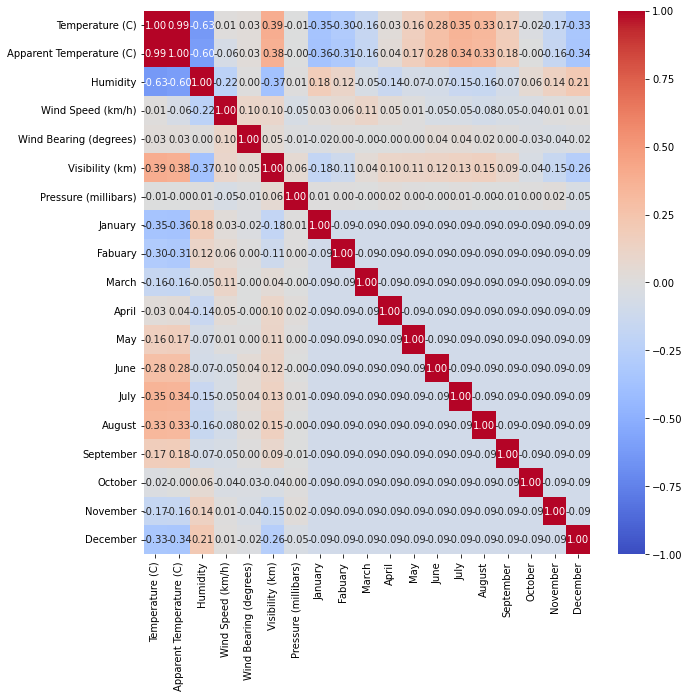

In [ ]:
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,vmin=-1,cmap='coolwarm',annot=True, fmt='.2f')

# Data prepration for machine learning

העברת הנתונים מפאנדאס לנאמפיי, נירמול הנתונים לפי פונקציה. הצגת התפלגות train, test.

בפרק זה אכין את הנתונים למכונות הלומדות. אעביר מפאנדאס לנאמפיי את הנתונים כיוון שאלו הנתונים שהמכונות יודעות לעבוד איתם בצורה המיטבית, אנרמל באמצעות פונקציה מובנית, שתעשה את הפעולה הרבה יותר טוב משאני אוכל, ואחלק את הנתונים לפי TRAIN,TEST

In [ ]:
y=Y.to_numpy()
y

array(['rain', 'rain', 'rain', ..., 'rain', 'rain', 'rain'], dtype=object)

In [ ]:
X=df.to_numpy()
X

array([[ 9.47222222,  7.38888889,  0.89      , ...,  0.        ,
         0.        ,  0.        ],
       [ 9.35555556,  7.22777778,  0.86      , ...,  0.        ,
         0.        ,  0.        ],
       [ 9.37777778,  9.37777778,  0.89      , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [22.03888889, 22.03888889,  0.56      , ...,  0.        ,
         0.        ,  0.        ],
       [21.52222222, 21.52222222,  0.6       , ...,  0.        ,
         0.        ,  0.        ],
       [20.43888889, 20.43888889,  0.61      , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.50697507, 0.52348604, 0.89      , ..., 0.        , 0.        ,
        0.        ],
       [0.50508505, 0.52108359, 0.86      , ..., 0.        , 0.        ,
        0.        ],
       [0.50544505, 0.5531439 , 0.89      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.71055711, 0.7419435 , 0.56      , ..., 0.        , 0.        ,
        0.        ],
       [0.70218702, 0.73423909, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.68463685, 0.71808467, 0.61      , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print("Train:\n")
print("x:", X_train.shape)
print("y:",y_train.shape)
print("\nTest:\n")
print("x:", X_test.shape)
print("y:",y_test.shape)

Train:

x: (67517, 19)
y: (67517,)

Test:

x: (28936, 19)
y: (28936,)


# Machine learning

יצירת מכונות לומדות על פי סוגי האלגוריתמים שלמדנו: 

Knn

Svm

Percepron

## KNN

הרצת אלגוריתם knn 

ובדיקת הדיוק על פי המדדים:

Accuracy

F1

Recall

Precision

ועל פי מטריצת הבלבול

הK הכי טוב הוא 3.

בדקתי במרווחים של 5 בין 3 ל 100
מצורפת תמונה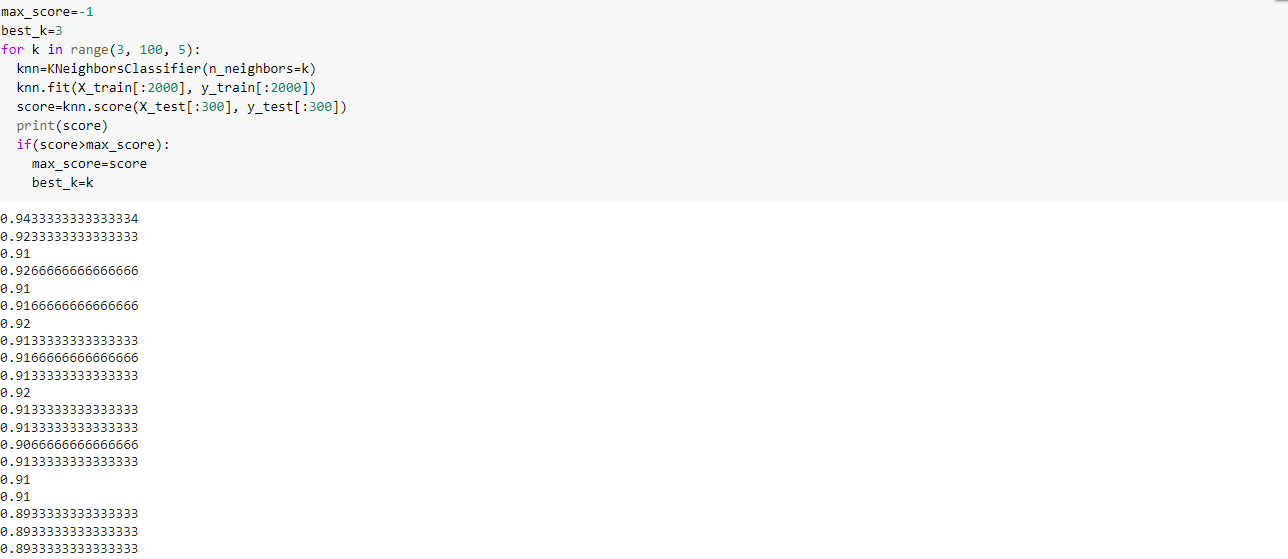

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_hat=knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


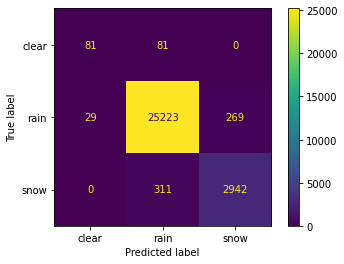

In [ ]:
plot_confusion_matrix(knn, X_test, y_test)

In [ ]:
print("Recall score: ",recall_score(y_test, y_hat, average="micro"))
print("Precision score: ",precision_score(y_test, y_hat, average="micro"))
print("F1 score: ",f1_score(y_test, y_hat, average="micro"))
print("Accuracy score: ",accuracy_score(y_test, y_hat))

Recall score:  0.9761542714957147
Precision score:  0.9761542714957147
F1 score:  0.9761542714957147
Accuracy score:  0.9761542714957147


## SVM

הרצת אלגוריתם SVM 

ובדיקת הדיוק על פי המדדים:

Accuracy

F1

Recall

Precision

ועל פי מטריצת הבלבול

שימוש ברגרסיה לינארית

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_hat=clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


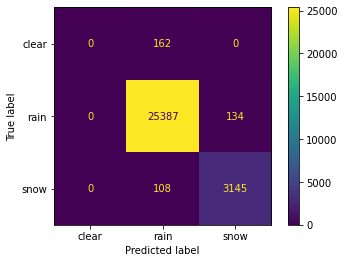

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  

In [ ]:
print("Recall score: ",recall_score(y_test, y_hat, average="macro"))
print("Precision score: ",precision_score(y_test, y_hat, average="micro"))
print("F1 score: ",f1_score(y_test, y_hat, average="micro"))
print("Accuracy score: ",accuracy_score(y_test, y_hat))

Recall score:  0.6538497663603908
Precision score:  0.9860381531656068
F1 score:  0.9860381531656068
Accuracy score:  0.9860381531656068


## Perceptron

הרצת אלגוריתם PERCEPTRON 

ובדיקת הדיוק על פי המדדים:

Accuracy

F1

Recall

Precision

ועל פי מטריצת הבלבול

In [ ]:
clf = Perceptron(tol=1e-3, random_state=42,verbose=0,n_iter_no_change=100)
clf.fit(X_train, y_train)#אימון מערכת
print(clf.score(X_train, y_train))

0.9847742050150332


In [ ]:
y_hat = clf.predict(X_test)
print("Recall score: ",recall_score(y_test, y_hat, average="micro"))
print("Precision score: ",precision_score(y_test, y_hat, average="micro"))
print("F1 score: ",f1_score(y_test, y_hat, average="micro"))
print("Accuracy score: ",accuracy_score(y_test, y_hat))

Recall score:  0.9833079900470003
Precision score:  0.9833079900470003
F1 score:  0.9833079900470003
Accuracy score:  0.9833079900470003


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


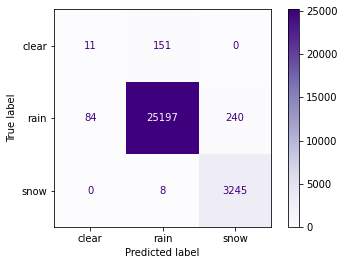

In [ ]:
plot_confusion_matrix(clf, X_test, y_test, cmap="Purples")  

# Summary

**:כבלוק טקסט**

לסיכום, הפרויקט שלי מתחלק לשני חלקים עיקריים: מדעי הנתונים וניתוחם, למידת מכונה. אתייחס אליהם בנפרד.
1.	בפרויקט שלי השתמשתי בנתונים המורכבים מדגימות של מזג האוויר המוצגות בפרמטרים רבים. בקוד, הצגתי את הנתונים, הצגתי קשר בין הנתונים ואת טבע הנתונים בגרפים, ניקיתי את הנתונים, שיניתי וסידרתי את הפרמטרים (עמודות), נרמלתי את הנתונים, והכנתי אותם לקראת שלב למידת המכונה. בשלב הזה נתקעתי לעתים כיוון שלא הבנתי את החומר בצורה טובה. תוך כדי הכנת השלב בפרויקט למדתי מפורומים ומאתרי לימוד באינטרנט להשתמש ב PANDAS, NUMPY, SEABORN בצורה מיטבית ואני מאמין שהפרויקט שלי מעיד על כך.
2.	בפרויקט השתמשתי בשלוש סוגים של מכונות לומדות: KNN, SVM, PERCEPTRON. את שלוש המכונות למדנו בכיתה בשיעורי למידת מכונה. שלבי יצירת המכונות הלומדות והערכתן היו דומים למדי; למעט KNN שהיה שונה במעט כיוון שבמכונה הזו צריך למצוא גם את ה K הטוב ביותר. במשך הכנת השלב הזה (שהיה קצר הרבה יותר משלב מדעי הנתונים) לא נתקעתי בקשיים. נעזרתי בקוד שהוצג בשיעורים ובמטלות ושיעורי הבית שהגשתי על מנת להגיע לקוד מסודר ונכון. הדבר היחיד שהיה מעט מעיק בשלב הזה היה למצוא את ה K הטוב ביותר במכונה KNN, כפי שכתבתי למעלה. מציאת הערך הייתה מעיקה בגלל גודל הנתונים שהשתמשתי (97000 דגימות). בגלל גודל הנתונים, הרצת האלגוריתם שוב ושוב כדי למצוא את הציון המקסימלי לקחה זמן רב מאד, מסיבה זו לא הכנסתי את הבלוק לקוד, אלא רק צילום מסך של מגמת הירידה בציון.

מסקנות:
המסקנות שלי מהפרויקט הן:
א.	מענה על שאלת החקר שלי אפשרי ביותר, ועוד בדיוק גבוה. הגעתי לציונים הנעים בין 96% ל 99% בשלוש המכונות.
ב.	מאגר הנתונים שהשתמשתי בו גדול מדי. גודל הנתונים הפריע לי בכמה מקומות בקוד, בעיקר מבחינת זמן ריצה. כאשר רציתי לשנות משהו בקוד ולהריץ ולבדוק שעובד, לקח זמן רב יותר משציפיתי.
הצעות לשיפור:
ראשית, אני חושב שהייתי יכול להתייחס לשנים שבהן נלקחו הדגימות, ולא רק לחודשים. אני לא יודע עד כמה זה היה משפר את הדיוק, אבל שיפור יכול להיות אפשרי. שנית, הייתי יכול להוציא גם נתונים חריגים בגודלם ולא רק בסוגם ובכך לנקות את הנתונים בצורה טובה יותר ולהגיע לתוצאה טובה יותר. כפי שכתבתי למעלה, גודל הנתונים הקשה על דברים מהסוג הזה ולכן וויתרתי על כך בפרויקט שלי.


**צילום מסמך וורד:**

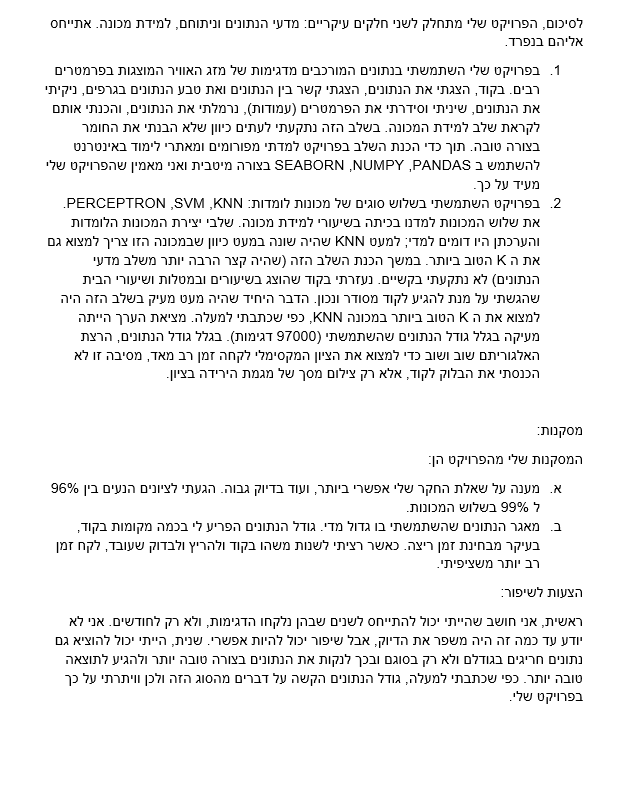